# 房地产数据分析案例

本章将通过一个真实的房地产数据集，一步步实践 Pandas 的数据处理、分析以及 Matplotlib 的可视化能力，从数据中挖掘有价值的信息。

### 业务背景

在房地产市场，准确的房价预测和市场分析至关重要。

  * **开发商**：需要制定合理的定价策略。
  * **投资者**：需要评估房产的潜在价值和回报率。
  * **购房者**：希望了解市场行情，找到高性价比的房产。

我们的任务是分析一个包含大量房屋销售数据的文件，挖掘不同特征（如面积、位置、年份）对房价的影响，分析不同地区的市场差异，并最终通过可视化手段直观展示这些规律。

### 数据源介绍

使用的数据（`house_sales.csv`）包含以下字段：

| 字段名 | 含义 | 数据类型 | 说明 |
| :--- | :--- | :--- | :--- |
| `id` | 唯一标识符 | 整数 | 房屋销售记录的 ID |
| `date` | 销售日期 | 日期时间 | 房屋实际成交日期 |
| `price` | 销售价格 | 数值型 | **核心分析指标** |
| `bedrooms` | 卧室数量 | 整数 | 影响房屋实用性 |
| `bathrooms` | 浴室数量 | 整数 | 影响房屋舒适度 |
| `sqft_living` | 居住面积 | 数值型 | 影响房价的关键因素 |
| `sqft_lot` | 土地面积 | 数值型 | 房屋所在土地总面积 |
| `floors` | 楼层数 | 整数 | 影响视野、采光等 |
| `waterfront` | 是否临水 | 整数 (0/1) | 1 表示临水，景观价值高 |
| `view` | 景观评分 | 整数 (0-4) | 评分越高，景观越好 |
| `condition` | 房屋状况 | 整数 (1-5) | 反映房屋维护情况 |
| `grade` | 整体质量 | 整数 (1-13) | 综合评估建筑质量、设计 |
| `sqft_above` | 地上面积 | 数值型 | 不包括地下室的面积 |
| `sqft_basement`| 地下室面积 | 数值型 | 额外的存储或功能空间 |
| `yr_built` | 建造年份 | 整数 | 房屋建成时间 |
| `yr_renovated` | 翻新年份 | 整数 | 0 表示未翻新 |
| `zipcode` | 邮政编码 | 整数 | 标识房屋所在地理区域 |
| `lat` | 纬度 | 数值型 | 地理位置坐标 |
| `long` | 经度 | 数值型 | 地理位置坐标 |

### 分析目标

通过 Pandas 计算以下指标来回答业务问题：

1.  **整体了解数据**：
      * **描述性统计**：计算数值列的均值、中位数、标准差、最大/最小值和四分位数，了解房价、面积等的集中趋势和分布范围。
2.  **探索影响房价的因素**：
      * **相关性分析**：使用皮尔逊相关系数，量化居住面积、卧室数量、质量评分等特征与 `price` 之间的线性关系。
3.  **对比不同群体的差异**：
      * **分组统计 (按邮政编码)**：计算不同 `zipcode` 区域的平均房价、平均居住面积等，对比区域差异。
      * **分组统计 (按翻新/房龄)**：分析是否翻新、房屋新旧对房价的影响。
4.  **观察市场趋势**：
      * **时间序列分析**：按销售年份 `date` 分组，计算每年的平均房价，观察市场趋势。

### 代码实现步骤

按顺序执行：数据读取 -> 数据清洗 -> 特征工程 -> 探索性分析 (EDA) -> 可视化。

### 解决中文和负号显示问题

Matplotlib 默认不支持中文，且可能将负号显示为方框。可以通过 `rcParams` 修改全局配置，并**根据操作系统和当前实际已安装的字体自动选择合适的中文字体**来解决。

* 通过 `rcParams` 设置全局字体和负号显示：
  * 在 **Windows** 下，从 `SimHei`、`Microsoft YaHei` 等常见中文字体中自动选择可用的一个；
  * 在 **macOS** 下，从 `PingFang SC`、`Songti SC`、`STHeiti`、`Hiragino Sans GB` 等系统常见中文字体中自动选择可用的一个；
  * 若找不到候选字体，则使用默认字体（此时中文可能显示为方框）；
  * 通过 `rcParams["axes.unicode_minus"] = False` 解决负号显示为方框的问题。

示例代码（自动判断系统并选择可用的中文字体）：

使用字体: Songti SC


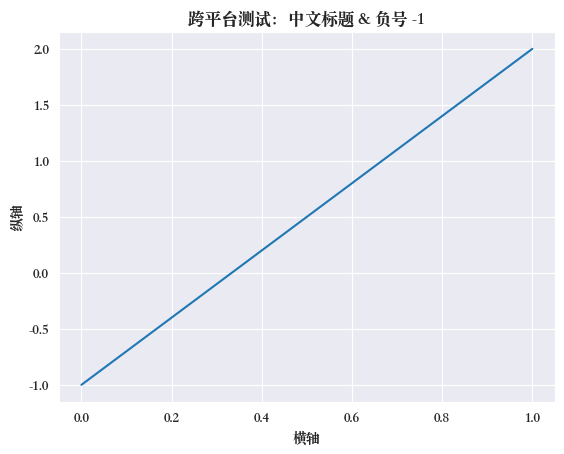

In [1]:
import sys
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager

def pick_font(candidates):
    """从候选字体列表中选出当前系统里存在的第一个"""
    available = {f.name for f in font_manager.fontManager.ttflist}
    for name in candidates:
        if name in available:
            return name
    return None

# 不同系统下的中文字体候选列表
if sys.platform.startswith("win"):
    # Windows 上常见的中文字体
    candidate_fonts = [
        "SimHei",           # 黑体
        "Microsoft YaHei",  # 微软雅黑
        "MS Gothic"
    ]
elif sys.platform == "darwin":
    # macOS 上常见的中文字体（按你机器实际情况为准）
    candidate_fonts = [
        "PingFang SC",
        "Heiti SC",
        "STHeiti",
        "Songti SC",
        "Hiragino Sans GB",
        "Noto Sans CJK SC",
    ]
else:
    # 其他系统，比如 Linux，可以再补充
    candidate_fonts = [
        "Noto Sans CJK SC",
        "SimHei",
        "WenQuanYi Zen Hei"
    ]

font_name = pick_font(candidate_fonts)

if font_name:
    print(f"使用字体: {font_name}")
    rcParams["font.sans-serif"] = [font_name]
    rcParams["font.family"] = "sans-serif"
else:
    print("⚠ 没找到候选中文字体，将使用默认字体（中文可能显示为方框）。")

# 解决负号显示为方框
rcParams["axes.unicode_minus"] = False

# ==== 测试 ====
plt.plot([0, 1], [-1, 2])
plt.title("跨平台测试：中文标题 & 负号 -1")
plt.xlabel("横轴")
plt.ylabel("纵轴")
plt.show()


#### 数据读取与概览

🎯 **目标**：加载数据到内存，并查看数据的基本情况（行数、列数、数据类型）。

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取 CSV 文件 (请确保文件在您的工作目录下)
data = pd.read_csv('data/house_sales.csv')

print('数据基本信息：')
data.info()

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   date           10000 non-null  object 
 2   price          10000 non-null  float64
 3   bedrooms       10000 non-null  int64  
 4   bathrooms      10000 non-null  int64  
 5   sqft_living    10000 non-null  int64  
 6   sqft_lot       10000 non-null  int64  
 7   floors         10000 non-null  int64  
 8   waterfront     10000 non-null  int64  
 9   view           10000 non-null  int64  
 10  condition      10000 non-null  int64  
 11  grade          10000 non-null  int64  
 12  sqft_above     10000 non-null  int64  
 13  sqft_basement  10000 non-null  int64  
 14  yr_built       10000 non-null  int64  
 15  yr_renovated   10000 non-null  int64  
 16  zipcode        10000 non-null  int64  
 17  lat            10000 non-null  float64
 18 

`pd.read_csv()` 用于读取数据文件。`data.info()` 会输出一个摘要，显示总共有多少条记录（Entries）、多少个列（Columns），以及每一列的名称、非空值数量和数据类型（Dtype）。这能帮我们快速发现 `date` 列是 `object`（字符串）类型，需要后续转换。

#### 数据清洗

🎯 **目标**：处理数据中的缺失值和异常值，确保分析结果的准确性。

In [4]:
# 1. 检查并处理缺失值
missing_values = data.isnull().sum()
print('各列缺失值数量：')
print(missing_values[missing_values > 0]) # 只显示有缺失值的列

# 简单地删除包含缺失值的行
data = data.dropna()

# 2. 处理异常值 (以房价 price 为例，使用 IQR 方法)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# 定义异常值的上下限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 筛选出在合理范围内的数据
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

print(f"清洗后数据剩余: {len(data)} 行")

各列缺失值数量：
Series([], dtype: int64)
清洗后数据剩余: 9930 行


1.  **缺失值**：`data.isnull().sum()` 统计每列有多少个 `NaN` (缺失值)。`data.dropna()` 是一种简单的处理方式，它会删除任何包含至少一个缺失值的*行*。
2.  **异常值 (IQR法)**：IQR（四分位距）是 `Q3` (75%分位数) 和 `Q1` (25%分位数) 的差距。我们通常认为小于 `Q1 - 1.5*IQR` 或大于 `Q3 + 1.5*IQR` 的值为异常值。这里我们只保留了房价在“正常”范围内的数据。

#### 数据类型转换

🎯 **目标**：将 `date` 列从字符串（object）转换为日期（datetime）类型，以便进行时间序列分析。

In [5]:
# 将日期列转换为日期类型
data['date'] = pd.to_datetime(data['date'])
print("date 列的新类型:", data['date'].dtype)

date 列的新类型: datetime64[ns]


`pd.to_datetime()` 是 Pandas 提供的强大工具，能自动解析多种格式的日期字符串。转换后，我们就可以轻松地从 `date` 列中提取年份（`.dt.year`）、月份（`.dt.month`）等信息。

#### 特征工程 (创建新特征)

🎯 **目标**：基于现有列创建新的、可能更有分析价值的列。

In [6]:
# 1. 计算房屋的使用年限 (销售年份 - 建造年份)
data['age'] = data['date'].dt.year - data['yr_built']

# 2. 创建新特征：是否翻新 (0=未翻新, 1=已翻新)
# yr_renovated > 0 说明翻新过
data['is_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

print(data[['age', 'is_renovated']].head())

   age  is_renovated
0   26             1
1    0             0
2   40             1
3  100             1
4  111             0


1.  **`age` (房龄)**：房龄通常比建造年份更直观地影响房价。
2.  **`is_renovated` (是否翻新)**：`yr_renovated` (翻新年份) 列中有很多 0。我们使用 `.apply()` 和 `lambda` 函数将其转换为一个简单的 0/1 标志（二元特征），这在后续分组和建模中更易于使用。

#### 描述性统计

🎯 **目标**：获取所有数值型特征的快速概览（均值、中位数、标准差等）。

In [11]:
# 1. 找出所有数值型列的 *列名*
numeric_columns = data.select_dtypes(include=[np.number]).columns

# 2. 使用这些列名从 data 中 *提取数据* (得到一个新的 DataFrame)，
#    然后再对这个 *新的数据表* 进行 .describe()
description = data[numeric_columns].describe(percentiles=[.25, .5, .75])

print('数值型列的描述性统计：')
print(description)

数值型列的描述性统计：
                 id          price     bedrooms    bathrooms  sqft_living  \
count   9930.000000    9930.000000  9930.000000  9930.000000  9930.000000   
mean    5001.107049  501121.772151     4.496878     3.521349  2906.238671   
std     2885.966447   97124.951211     2.297853     1.727304  1210.034706   
min        1.000000  229983.900000     1.000000     1.000000   801.000000   
25%     2503.250000  433529.705000     2.000000     2.000000  1865.000000   
50%     5001.500000  501561.090000     4.000000     4.000000  2909.000000   
75%     7496.750000  567653.252500     7.000000     5.000000  3957.000000   
max    10000.000000  770223.220000     8.000000     6.000000  5000.000000   

           sqft_lot       floors   waterfront         view    condition  \
count   9930.000000  9930.000000  9930.000000  9930.000000  9930.000000   
mean    5520.495065     1.999295     0.498489     2.016314     2.985901   
std     2604.054446     0.819431     0.500023     1.418670     1.4161

`select_dtypes` 帮我们自动筛选出所有数字类型的列。`.describe()` 会返回一个 DataFrame，包含 `count` (计数), `mean` (均值), `std` (标准差), `min` (最小), `25%` (Q1), `50%` (中位数), `75%` (Q3), `max` (最大)。

> 快速查看数据分布。例如，查看 `price` 的 50%（中位数）和 mean（均值），如果均值远大于中位数，说明数据可能右偏（有少量极高价格的房产拉高了均值）。

#### 相关性分析

🎯 **目标**：量化分析哪些特征与房价 `price` 的关系最密切。

In [12]:
# 计算相关性矩阵
correlation = data[numeric_columns].corr()

# 提取 'price' 列与其他所有特征的相关性，并按降序排列
print('各特征与房价的相关性：')
print(correlation['price'].sort_values(ascending=False))

各特征与房价的相关性：
price            1.000000
yr_built         0.012998
sqft_living      0.011616
id               0.011216
bathrooms        0.008096
zipcode          0.007931
bedrooms         0.004881
grade            0.004603
sqft_lot         0.003644
condition        0.001813
waterfront       0.001748
is_renovated    -0.000069
yr_renovated    -0.000186
lat             -0.001472
view            -0.002817
sqft_basement   -0.003476
age             -0.004177
sqft_above      -0.005068
floors          -0.005926
long            -0.006436
Name: price, dtype: float64


`.corr()` 计算皮尔逊相关系数，范围在 -1 到 1 之间：

  * **接近 1**：强正相关（如 `sqft_living` 越大，`price` 越高）
  * **接近 -1**：强负相关（如 `age` 越大，`price` 可能越低）
  * **接近 0**：线性关系不强

> 这是特征筛选的关键一步。我们通常会重点关注那些与 `price` 相关系数绝对值较高的特征，如 `sqft_living` (居住面积) 和 `grade` (质量评分)。

#### 分组分析：按邮政编码

🎯 **目标**：对比不同地理区域（`zipcode`）的平均房价、面积和卧室数。

In [13]:
# 按 'zipcode' 分组，并计算指定列的均值
zipcode_stats = data.groupby('zipcode').agg({
    'price': 'mean',
    'sqft_living': 'mean',
    'bedrooms': 'mean'
})

# 重命名列
zipcode_stats.columns = ['avg_price', 'avg_sqft_living', 'avg_bedrooms']
# 按平均房价排序
print('不同邮政编码区域的统计信息 (按均价排序)：')
print(zipcode_stats.sort_values(by='avg_price', ascending=False).head())

不同邮政编码区域的统计信息 (按均价排序)：
             avg_price  avg_sqft_living  avg_bedrooms
zipcode                                              
98006    505345.428558      2887.992944      4.599798
98005    503306.661532      2975.695481      4.548134
98010    503083.699933      2916.949234      4.623563
98007    502716.775391      2900.131553      4.358061
98001    502211.909176      2917.520854      4.357905


`groupby('zipcode')` 将数据按邮编分成多个“小本子”。`.agg()` (聚合) 允许我们对每个“小本子”同时进行多种计算（这里都是 `mean`）。

> 识别高价值区域。这个结果清晰地显示了哪些地区的平均房价最高，这对于投资和定价至关重要。

#### 分组分析：按是否翻新

🎯 **目标**：分析房屋是否翻新对房价、面积和卧室数的平均影响。

In [14]:
# 按 'is_renovated' 分组
renovation_stats = data.groupby('is_renovated').agg({
    'price': 'mean',
    'sqft_living': 'mean',
    'bedrooms': 'mean'
})
renovation_stats.columns = ['avg_price', 'avg_sqft_living', 'avg_bedrooms']

print('是否翻新分组的统计信息：')
print(renovation_stats)

是否翻新分组的统计信息：
                  avg_price  avg_sqft_living  avg_bedrooms
is_renovated                                              
0             501126.095841      2899.849035      4.506505
1             501111.467479      2921.467121      4.473935


与上一步类似，但这次是按 `is_renovated` (0 或 1) 分组。结果会清晰地显示 "已翻新" (1) 和 "未翻新" (0) 的房屋在各项指标上的均值差异。

#### 分组分析：按房龄

🎯 **目标**：了解不同房龄区间的房屋特征。

In [16]:
# 使用 pd.cut 将 'age' (房龄) 划分为 5 个等宽的区间
data['age_group'] = pd.cut(data['age'], bins=5)

# 按房龄区间分组
age_stats = data.groupby('age_group', observed=True).agg({
    'price': 'mean',
    'sqft_living': 'mean',
    'bedrooms': 'mean'
})

print('按房屋使用年限分组的统计信息：')
print(age_stats)

按房屋使用年限分组的统计信息：
                        price  sqft_living  bedrooms
age_group                                           
(-0.124, 24.8]  501594.625623  2912.909214  4.511300
(24.8, 49.6]    500933.820999  2912.564145  4.485583
(49.6, 74.4]    501518.890152  2867.016575  4.421271
(74.4, 99.2]    496723.141722  2910.078910  4.628407
(99.2, 124.0]   503413.042977  2926.920930  4.358140


`pd.cut` 是一个用于“分箱”的便捷工具。它将连续的 `age` (例如 0-100 年) 切割成 `bins=5` (5个) 离散的区间（如 `(0, 20]`, `(20, 40]` 等）。然后我们就可以按这些区间进行 `groupby`。

#### 时间序列分析：每年平均房价

🎯 **目标**：观察房价随时间的变化趋势。

In [17]:
# 按销售日期的年份 ('date'.dt.year) 分组，计算 'price' 的均值
yearly_avg_price = data.groupby(data['date'].dt.year)['price'].mean()

print('每年的平均房价：')
print(yearly_avg_price)

每年的平均房价：
date
1900    488884.680000
1902    513972.100000
1903    509519.793333
1905    522640.340000
1906    470978.868333
            ...      
2020    512492.021111
2021    494507.942625
2022    498970.821277
2023    502406.178047
2024    499999.391169
Name: price, Length: 123, dtype: float64


我们利用了 `date` 列是 datetime 类型的优势，直接使用 `.dt.year` 提取年份来进行 `groupby`。这使我们能清晰地看到每一年份的平均成交价，用于判断市场是上涨还是下跌。

#### 时间序列分析：每年不同翻新情况的均价

🎯 **目标**：结合时间和翻新两个维度，看翻新对房价的影响是否随时间变化。

In [18]:
# 按两个键进行分组：年份 和 是否翻新
yearly_renovation_avg_price = data.groupby([data['date'].dt.year, 'is_renovated'])['price'].mean()

print('每年不同翻新情况的平均房价：')
print(yearly_renovation_avg_price)

每年不同翻新情况的平均房价：
date  is_renovated
1900  0               488884.680000
1902  0               513972.100000
1903  0               445335.310000
      1               637888.760000
1905  0               522640.340000
                          ...      
2022  1               484070.180990
2023  0               502393.039380
      1               502439.298437
2024  0               497149.856014
      1               505383.902403
Name: price, Length: 240, dtype: float64


`groupby` 可以接受一个列表 `[...]` 作为分组键。这会产生一个多级索引（MultiIndex），详细列出每一年份中，"已翻新" 和 "未翻新" 房屋各自的平均价格。

#### 数据可视化

🎯 **目标**：使用图表直观地展示分析结果。

##### 1. 房价分布直方图

  * **用途**：查看房价的整体分布情况，是集中在某个范围还是分散。

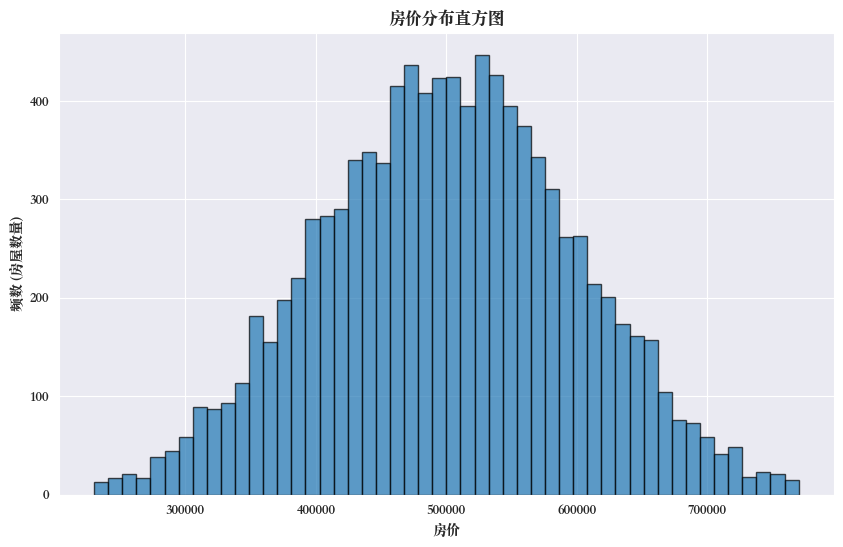

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=50, edgecolor='k', alpha=0.7) # 增加 bins 使图像更平滑
plt.title('房价分布直方图')
plt.xlabel('房价')
plt.ylabel('频数 (房屋数量)')
plt.show()

* **说明**：`plt.hist` 绘制直方图。`bins` 参数控制柱子的数量，越多则分箱越细。

##### 2. 居住面积与房价的散点图

  * **用途**：直观展示两个连续变量（面积和价格）之间的关系。

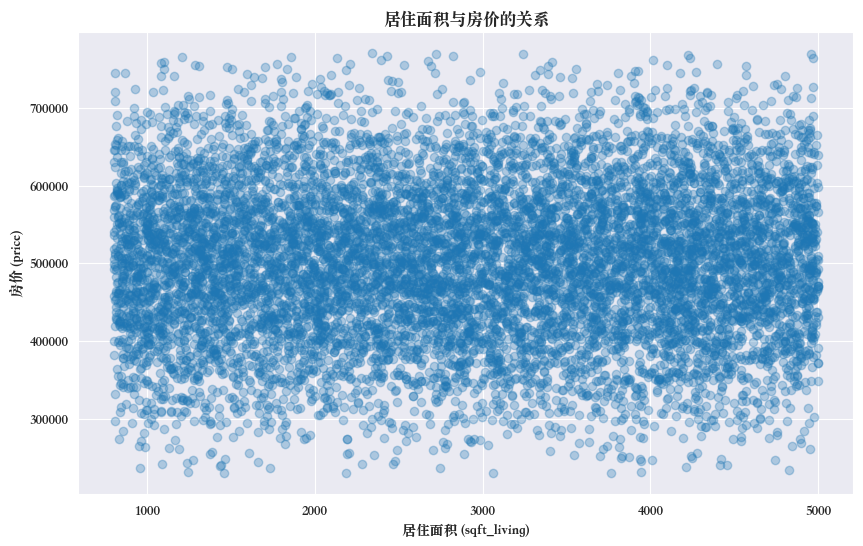

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(data['sqft_living'], data['price'], alpha=0.3) # alpha 增加透明度，缓解点重叠
plt.title('居住面积与房价的关系')
plt.xlabel('居住面积 (sqft_living)')
plt.ylabel('房价 (price)')
plt.show()

* **说明**：`plt.scatter` 绘制散点图。从图中通常能清晰看到一个正向趋势（面积越大，价格越高）。

##### 3. 各特征与房价的相关性热力图

  * **用途**：可视化相关性矩阵（`correlation`），快速识别强相关特征。

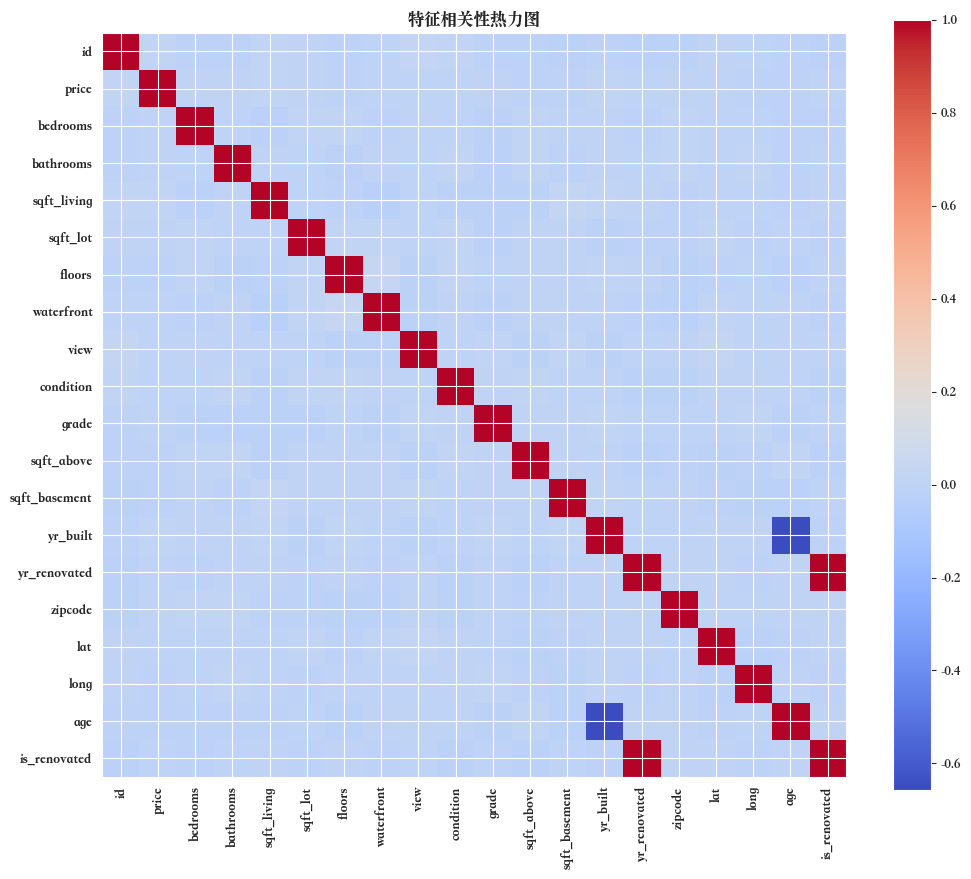

In [21]:
plt.figure(figsize=(12, 10))
# 使用 .corr() 计算相关性矩阵
corr_matrix = data[numeric_columns].corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('特征相关性热力图')
plt.show()

* **说明**：`plt.imshow` 用于绘制热力图。`cmap='coolwarm'` 指定了颜色方案（暖色=正相关，冷色=负相关）。对角线（自身相关）总是 1（最亮）。

##### 4. 不同邮政编码区域平均房价的柱状图

  * **用途**：对比不同类别（邮编）的数值（平均房价）。

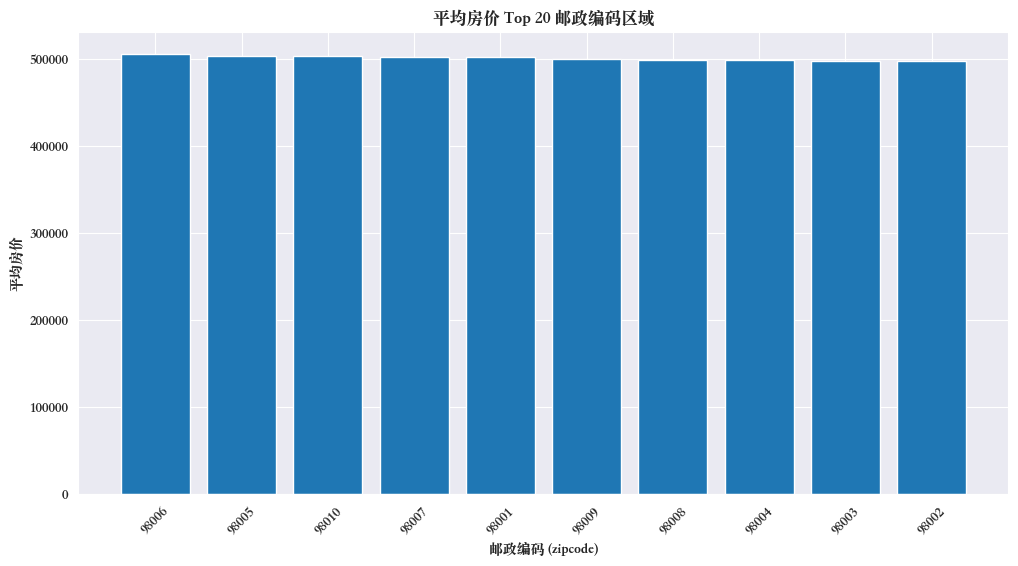

In [22]:
# 只画出房价最高的 20 个区域
top_20_zipcodes = zipcode_stats.sort_values(by='avg_price', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.bar(top_20_zipcodes.index.astype(str), top_20_zipcodes['avg_price'])
plt.title('平均房价 Top 20 邮政编码区域')
plt.xlabel('邮政编码 (zipcode)')
plt.ylabel('平均房价')
plt.xticks(rotation=45)
plt.show()

* **说明**：`plt.bar` 绘制柱状图。由于邮编太多，我们只选择 `head(20)` (前20名) 进行展示。

##### 5. 每年平均房价的折线图

  * **用途**：展示数据随时间变化的趋势。

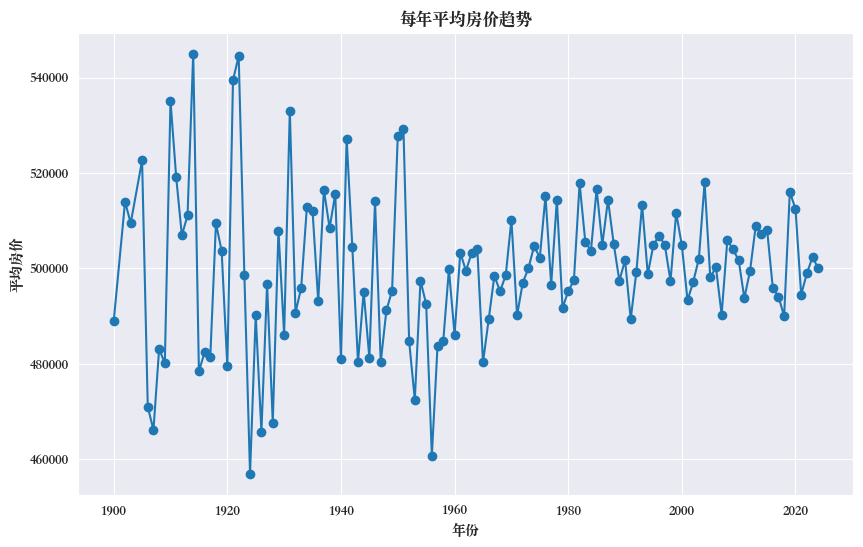

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o')
plt.title('每年平均房价趋势')
plt.xlabel('年份')
plt.ylabel('平均房价')
plt.grid(True) # 添加网格
plt.show()

* **说明**：`plt.plot` 绘制折线图，是展示时间序列数据的首选。

##### 6. 不同翻新情况的房价箱线图

  * **用途**：对比不同类别（是否翻新）的数据分布（中位数、四分位、异常值）。

<Figure size 800x600 with 0 Axes>

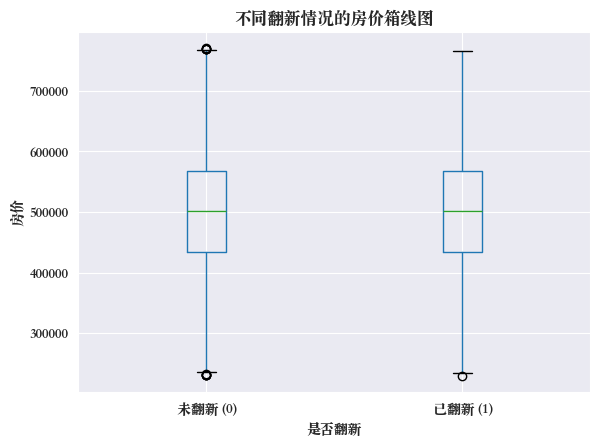

In [24]:
plt.figure(figsize=(8, 6))
data.boxplot(column='price', by='is_renovated')
plt.title('不同翻新情况的房价箱线图')
plt.xlabel('是否翻新')
plt.xticks([1, 2], ['未翻新 (0)', '已翻新 (1)']) # 设置 X 轴标签
plt.ylabel('房价')
plt.suptitle('')  # 去掉 Pandas 默认添加的标题
plt.show()

* **说明**：箱线图（Boxplot）能提供比柱状图（均值）更丰富的信息。我们可以看到 "已翻新" 房屋的中位数是否更高，以及其价格分布是否更分散。

##### 7. 房屋使用年限与房价的散点图

  * **用途**：查看房龄（`age`）和房价的关系。

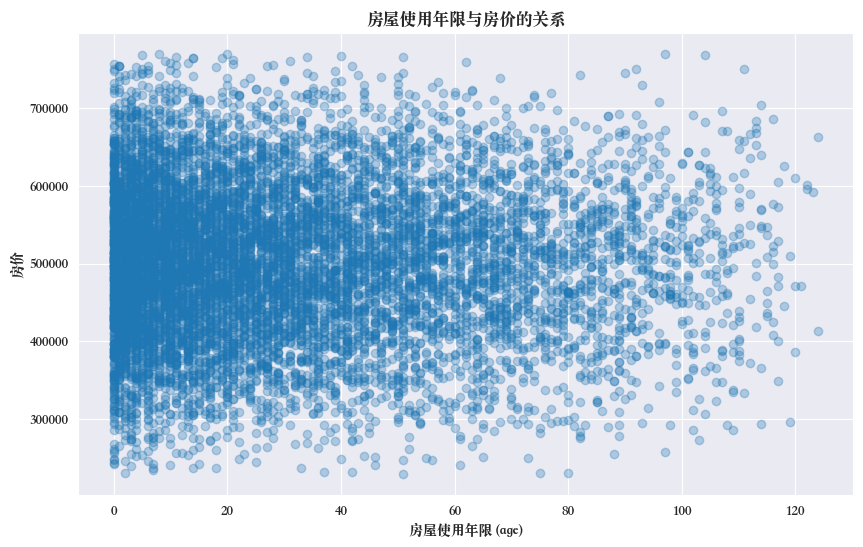

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['price'], alpha=0.3)
plt.title('房屋使用年限与房价的关系')
plt.xlabel('房屋使用年限 (age)')
plt.ylabel('房价')
plt.show()

* **说明**：这有助于我们验证房龄是否是一个负相关因素（即房龄越大，价格越低）。